<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [3]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Start                        921 non-null    object 
 1   End                          921 non-null    object 
 2   Sleep Quality (%)            921 non-null    float64
 3   Regularity (%)               921 non-null    float64
 4   Steps                        921 non-null    int64  
 5   Alarm mode                   921 non-null    object 
 6   Movements per hour           921 non-null    float64
 7   Time in bed (seconds)        921 non-null    float64
 8   Time asleep (seconds)        921 non-null    float64
 9   Time before sleep (seconds)  921 non-null    float64
 10  Window start                 841 non-null    object 
 11  Window stop                  841 non-null    object 
 12  Did snore                    921 non-null    bool   
 13  Snore time          

In [4]:
processed_df['Start']=pd.to_datetime(processed_df['Start'],format='%Y-%m-%d %H:%M:%S')
processed_df['End']=pd.to_datetime(processed_df['End'],format='%Y-%m-%d %H:%M:%S')
processed_df['Window start']=pd.to_datetime(processed_df['Window start'],format='%Y-%m-%d %H:%M:%S')
processed_df['Window stop']=pd.to_datetime(processed_df['Window stop'],format='%Y-%m-%d %H:%M:%S')

processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Start                        921 non-null    datetime64[ns]
 1   End                          921 non-null    datetime64[ns]
 2   Sleep Quality (%)            921 non-null    float64       
 3   Regularity (%)               921 non-null    float64       
 4   Steps                        921 non-null    int64         
 5   Alarm mode                   921 non-null    object        
 6   Movements per hour           921 non-null    float64       
 7   Time in bed (seconds)        921 non-null    float64       
 8   Time asleep (seconds)        921 non-null    float64       
 9   Time before sleep (seconds)  921 non-null    float64       
 10  Window start                 841 non-null    datetime64[ns]
 11  Window stop                  841 non-null    

# Question: Việc đi bộ hằng ngày có ảnh hưởng như thế nào đến chất lượng giấc ngủ

## Step 0: Purpose

- Nhằm xác định việc đi bộ hằng ngày có ảnh hưởng tích cực hay tiêu cực đến chất lượng giấc ngủ.

## Step 1: Analyzing

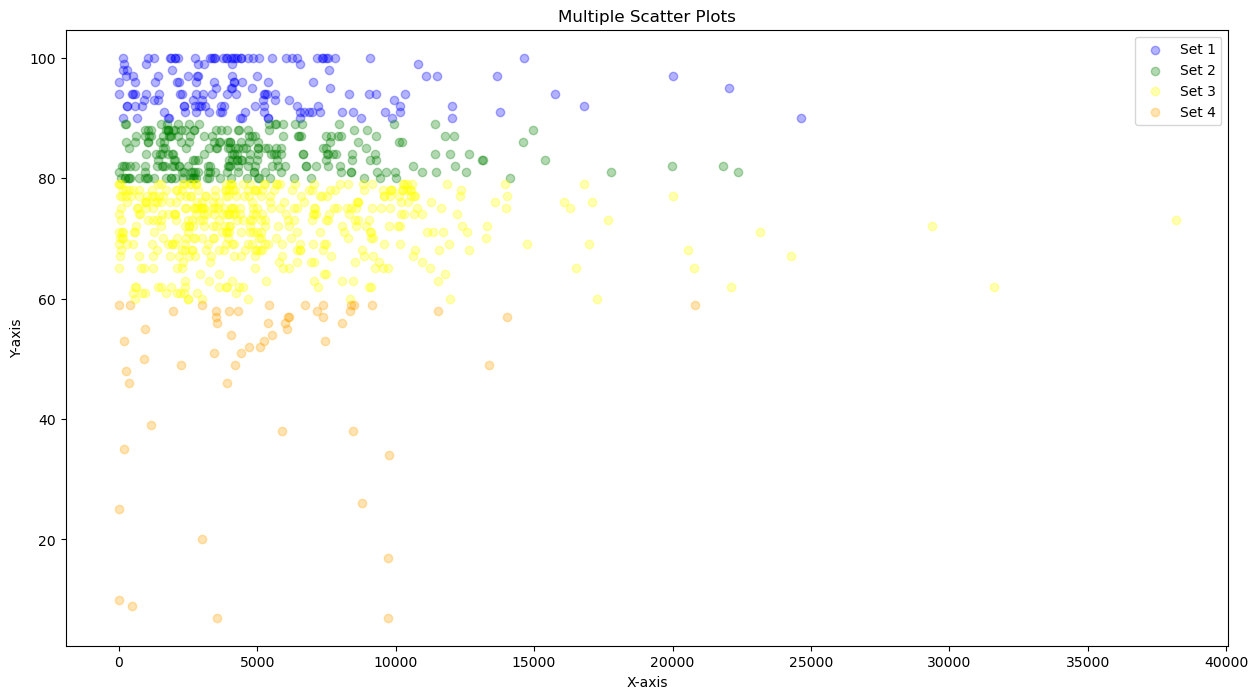

In [24]:
# Sample data for three sets of points
df_excellent = processed_df[processed_df['Sleep Quality (%)'] >= 90]
df_good = processed_df[(processed_df['Sleep Quality (%)'] < 90)&(processed_df['Sleep Quality (%)'] >= 80)]
df_fair = processed_df[(processed_df['Sleep Quality (%)'] < 80)&(processed_df['Sleep Quality (%)'] >= 60)]
df_poor = processed_df[processed_df['Sleep Quality (%)'] < 60]

x1 = df_excellent['Steps']
y1 = df_excellent['Sleep Quality (%)']

x2 = df_good['Steps']
y2 = df_good['Sleep Quality (%)']

x3 = df_fair['Steps']
y3 = df_fair['Sleep Quality (%)']

x4 = df_poor['Steps']
y4 = df_poor['Sleep Quality (%)']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Scatter plots
ax.scatter(x1, y1, label='Set 1', color='blue', alpha=0.3)
ax.scatter(x2, y2, label='Set 2', color='green', alpha=0.3)
ax.scatter(x3, y3, label='Set 3', color='yellow', alpha=0.3)
ax.scatter(x4, y4, label='Set 4', color='orange', alpha=0.3)

# Adding labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Multiple Scatter Plots')

# Adding a legend
ax.legend()

# Show the plot
plt.show()


## Step 2: Visualization

## Step 3: Answer

# Question: Xác định khoảng steps lý tưởng để có được giấc ngủ chất lượng vào buổi tối

## Step 0: Purpose

## Step 1: Analyzing

## Step 2: Visualization

## Step 3: Answer

# Question: Thời gian ngủ có ảnh hưởng đến chất lượng giấc ngủ như thế nào

## Step 0: Purpose

## Step 1: Analyzing

## Step 2: Visualization

## Step 3: Answer

# Question: Tần suất hoạt động trong lúc ngủ của người dùng và mối tương quan với chất lượng giấc ngủ

## Step 0: Purpose

## Step 1: Analyzing

## Step 2: Visualization

## Step 3: Answer